In [20]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Search for best hyperparameters using GridSearchCV and RandomForestRegressor

In [21]:
cars = pd.read_csv("old_cars.csv")

In [22]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [23]:
X = pd.get_dummies(X)

In [24]:
X.shape

(201, 39)

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Set aside some data for testing

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [27]:
model = RandomForestRegressor()
params_grid  = [{'n_estimators' : [10,20,30, 50,100] , 'max_depth' :[2,3,4, 8, 10]}]

In [28]:
grid_search = GridSearchCV(model, params_grid, cv = 5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [2, 3, 4, 8, 10],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [29]:
## display scores 
results = grid_search.cv_results_
for score,param in zip(results['mean_test_score'], results['params']):
      print(score,param)

0.8327645412189744 {'max_depth': 2, 'n_estimators': 10}
0.8390084236486466 {'max_depth': 2, 'n_estimators': 20}
0.8201298883183072 {'max_depth': 2, 'n_estimators': 30}
0.8327267610838899 {'max_depth': 2, 'n_estimators': 50}
0.8321483616221059 {'max_depth': 2, 'n_estimators': 100}
0.8028746855610954 {'max_depth': 3, 'n_estimators': 10}
0.8565020177979111 {'max_depth': 3, 'n_estimators': 20}
0.8491102520362492 {'max_depth': 3, 'n_estimators': 30}
0.8428523618811703 {'max_depth': 3, 'n_estimators': 50}
0.8505724360276468 {'max_depth': 3, 'n_estimators': 100}
0.8542896487963461 {'max_depth': 4, 'n_estimators': 10}
0.8459849045589296 {'max_depth': 4, 'n_estimators': 20}
0.8567197251212564 {'max_depth': 4, 'n_estimators': 30}
0.8649893066937133 {'max_depth': 4, 'n_estimators': 50}
0.8527870792464908 {'max_depth': 4, 'n_estimators': 100}
0.8704422155532725 {'max_depth': 8, 'n_estimators': 10}
0.8340027642299507 {'max_depth': 8, 'n_estimators': 20}
0.8518207324172018 {'max_depth': 8, 'n_estima

In [30]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 10}

In [31]:
grid_search.best_score_

0.8704422155532725

In [32]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=8, n_estimators=10)

### Build model with best estimator

In [33]:
model = grid_search.best_estimator_

In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [36]:
r2_score(y_test,y_pred)

0.936998825322208

In [37]:
np.sqrt(mse)

2356.91694355854

<Axes: ylabel='price'>

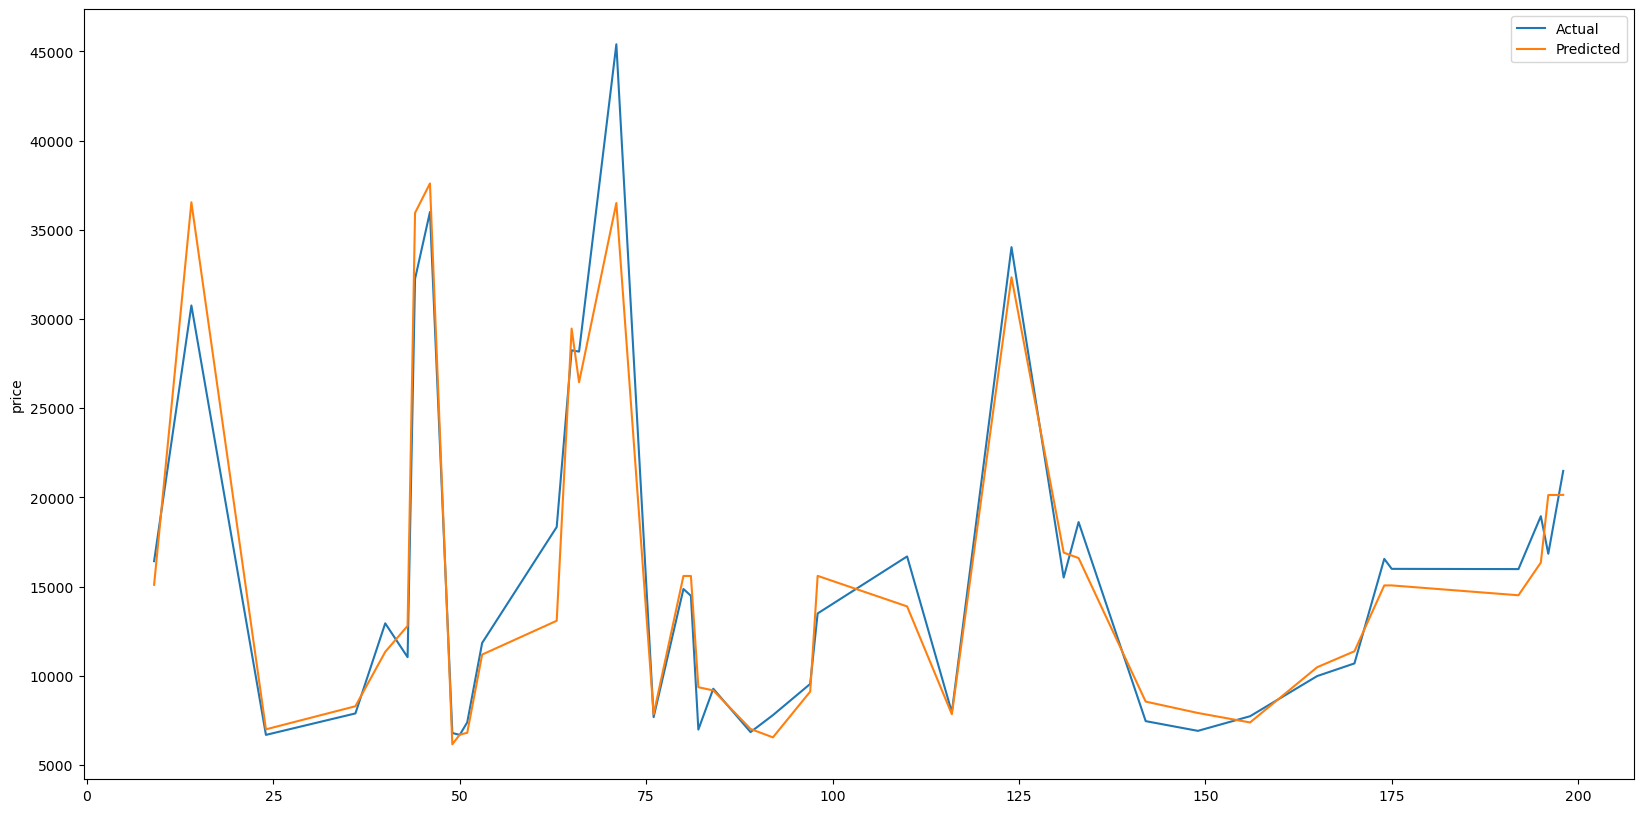

In [38]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")